In [46]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahsan81/hotel-reservations-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\parag\.cache\kagglehub\datasets\ahsan81\hotel-reservations-classification-dataset\versions\1


In [47]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [48]:
df = pd.read_csv(path + "/Hotel Reservations.csv")

In [49]:
df.columns


Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In this step we convert the booking status to two colomns, canceled=1 and not_canceled=0

In [50]:
df['is_canceled'] = df['booking_status'].apply(
    lambda x: 1 if str(x).strip().lower() == "canceled" else 0
)

df['is_canceled'].value_counts()


is_canceled
0    24390
1    11885
Name: count, dtype: int64

In [51]:
train_df, temp_df = train_test_split(
    df,
    test_size=0.30,         
    random_state=42,
    stratify=df['is_canceled']
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.50,        
    random_state=42,
    stratify=temp_df['is_canceled']
)

print("Train:", train_df.shape)
print("Val:", val_df.shape)
print("Test:", test_df.shape)


Train: (25392, 20)
Val: (5441, 20)
Test: (5442, 20)


In [52]:
print("TRAIN distribution:")
print(train_df['is_canceled'].value_counts())
print(train_df['is_canceled'].value_counts(normalize=True))

print("\nVALIDATION distribution:")
print(val_df['is_canceled'].value_counts())
print(val_df['is_canceled'].value_counts(normalize=True))

print("\nTEST distribution:")
print(test_df['is_canceled'].value_counts())
print(test_df['is_canceled'].value_counts(normalize=True))


TRAIN distribution:
is_canceled
0    17073
1     8319
Name: count, dtype: int64
is_canceled
0    0.672377
1    0.327623
Name: proportion, dtype: float64

VALIDATION distribution:
is_canceled
0    3658
1    1783
Name: count, dtype: int64
is_canceled
0    0.672303
1    0.327697
Name: proportion, dtype: float64

TEST distribution:
is_canceled
0    3659
1    1783
Name: count, dtype: int64
is_canceled
0    0.672363
1    0.327637
Name: proportion, dtype: float64


In [53]:
print("Shape",df.shape)

print("datatypes","\n",df.dtypes)


Shape (36275, 20)
datatypes 
 Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
is_canceled                               int64
dtype: obj

In [54]:
df.isnull().sum()


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
is_canceled                             0
dtype: int64

In [55]:
df.duplicated().sum()


np.int64(0)

In [56]:
df.describe()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,is_canceled
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,0.327636
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

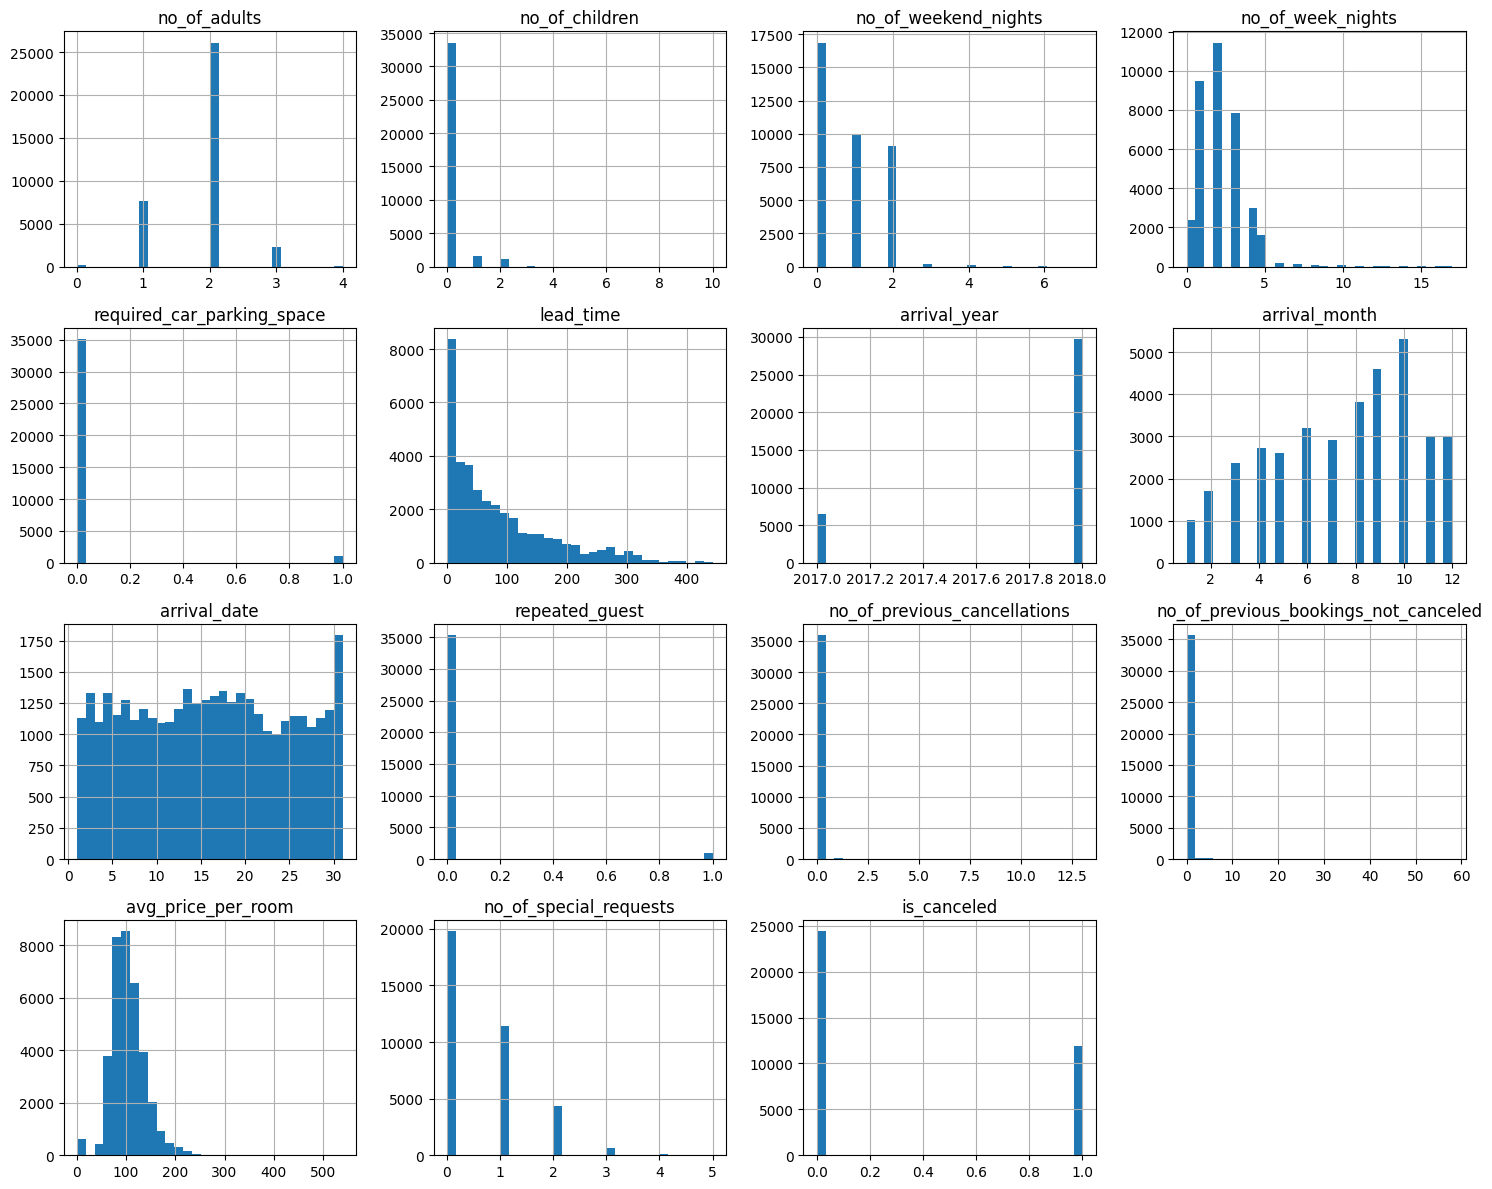

In [58]:
df.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

In [59]:
import numpy as np


Numeric columns: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'is_canceled']


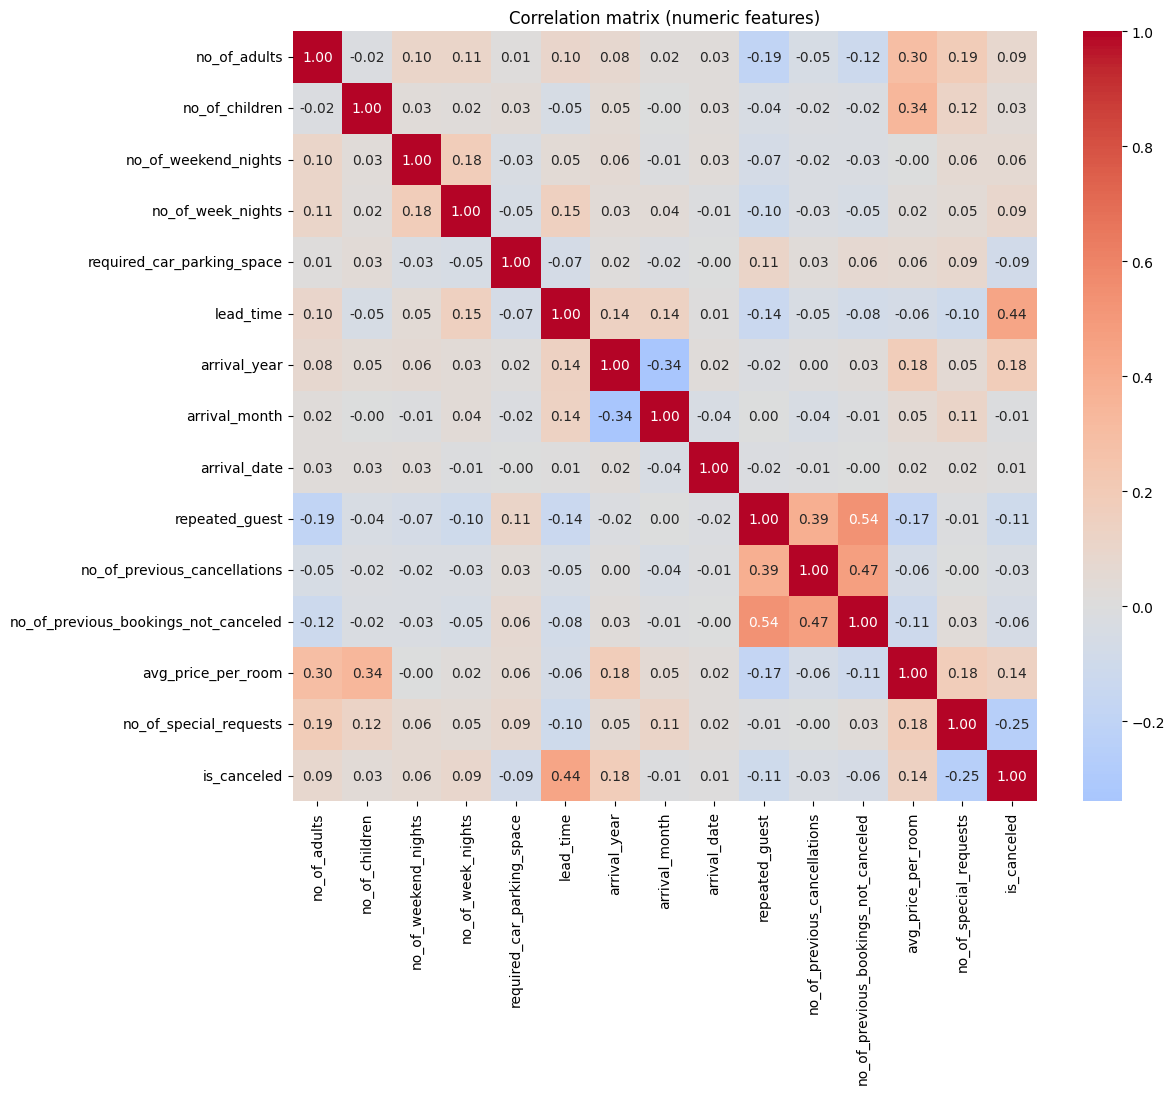

In [60]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

corr = df[numeric_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Correlation matrix (numeric features)")
plt.show()


<Axes: xlabel='is_canceled', ylabel='lead_time'>

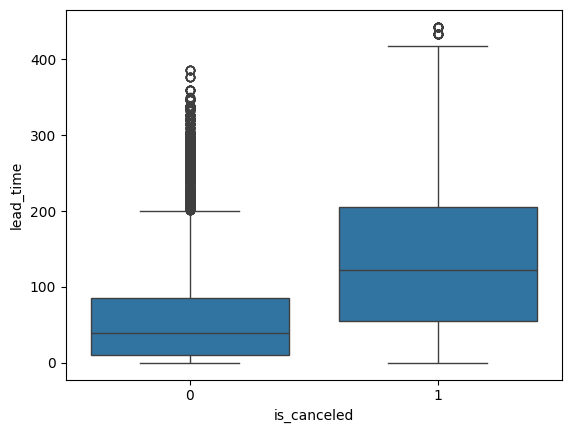

In [61]:
sns.boxplot(x='is_canceled', y='lead_time', data=df)


<Axes: xlabel='is_canceled', ylabel='avg_price_per_room'>

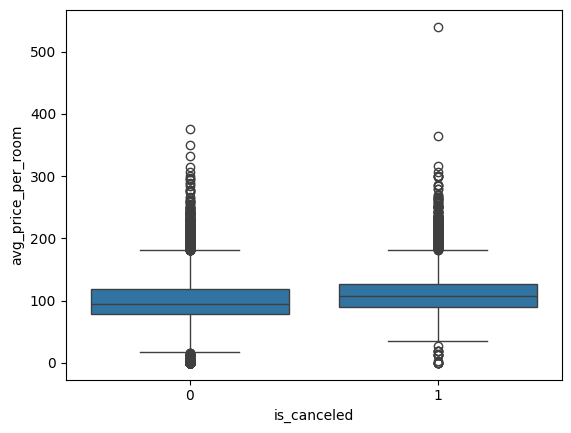

In [62]:
sns.boxplot(x='is_canceled', y='avg_price_per_room', data=df)


<Axes: xlabel='market_segment_type', ylabel='count'>

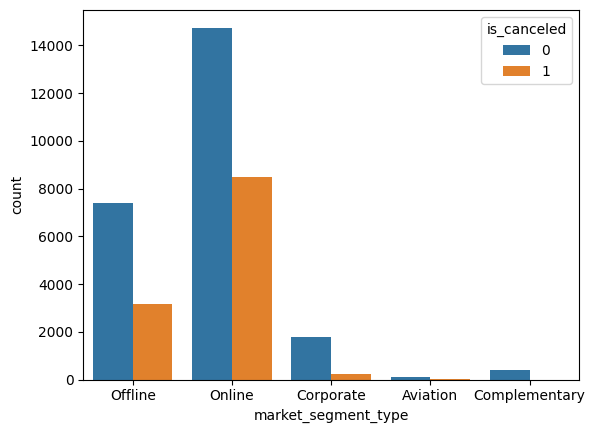

In [63]:
sns.countplot(x='market_segment_type', hue='is_canceled', data=df)


In [64]:
target_corr = corr['is_canceled'].drop('is_canceled').sort_values(key=lambda x: x.abs(), ascending=False)
print("Top correlations with is_canceled (abs sorted):\n", target_corr)


Top correlations with is_canceled (abs sorted):
 lead_time                               0.438538
no_of_special_requests                 -0.253070
arrival_year                            0.179529
avg_price_per_room                      0.142569
repeated_guest                         -0.107287
no_of_week_nights                       0.092996
no_of_adults                            0.086920
required_car_parking_space             -0.086185
no_of_weekend_nights                    0.061563
no_of_previous_bookings_not_canceled   -0.060179
no_of_previous_cancellations           -0.033728
no_of_children                          0.033078
arrival_month                          -0.011233
arrival_date                            0.010629
Name: is_canceled, dtype: float64


---- lead_time ----


count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

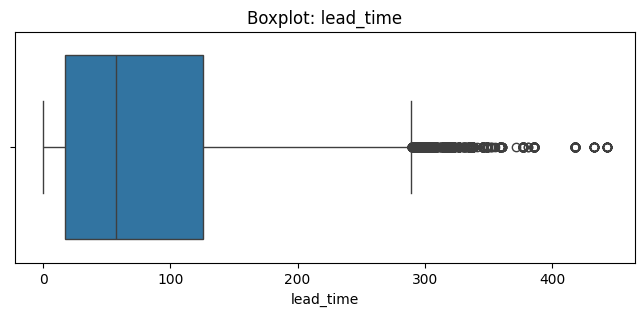

---- avg_price_per_room ----


count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

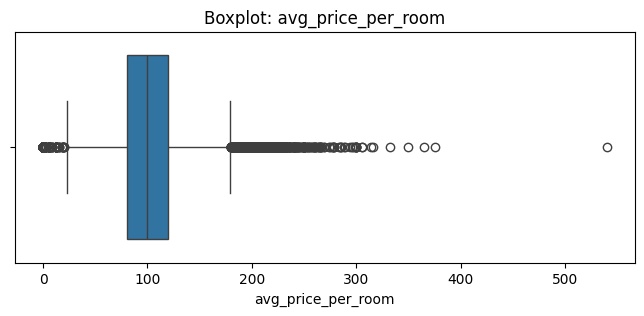

---- no_of_weekend_nights ----


count    36275.000000
mean         0.810724
std          0.870644
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: no_of_weekend_nights, dtype: float64

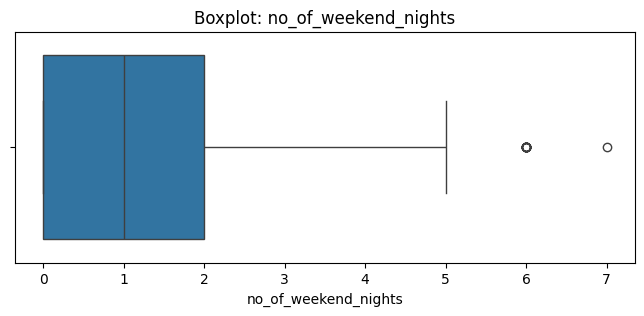

---- no_of_week_nights ----


count    36275.000000
mean         2.204300
std          1.410905
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: no_of_week_nights, dtype: float64

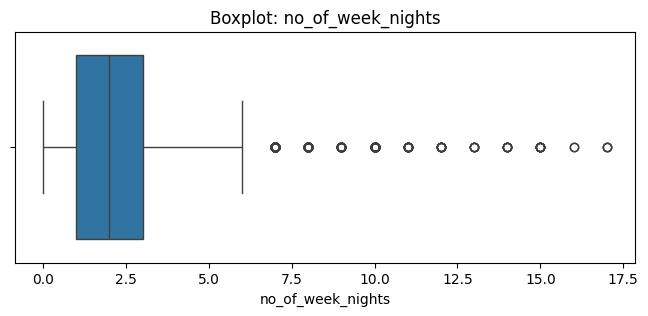

In [65]:
nums = ['lead_time','avg_price_per_room','no_of_weekend_nights','no_of_week_nights']
for c in nums:
    if c in df.columns:
        print("----", c, "----")
        display(df[c].describe())
        plt.figure(figsize=(8,3))
        sns.boxplot(x=df[c])
        plt.title(f"Boxplot: {c}")
        plt.show()


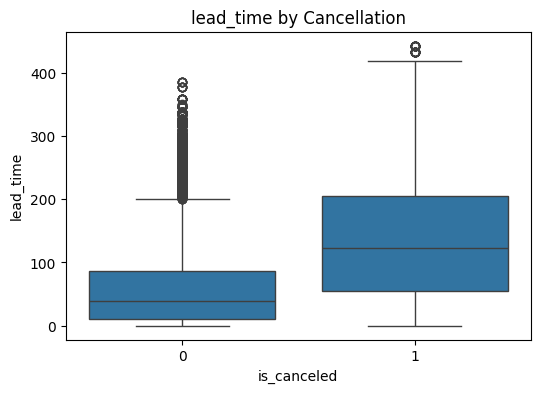

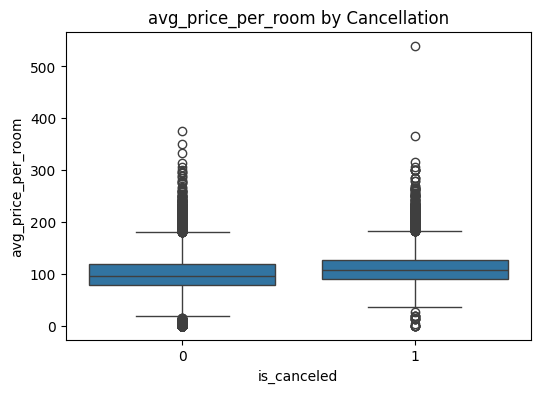

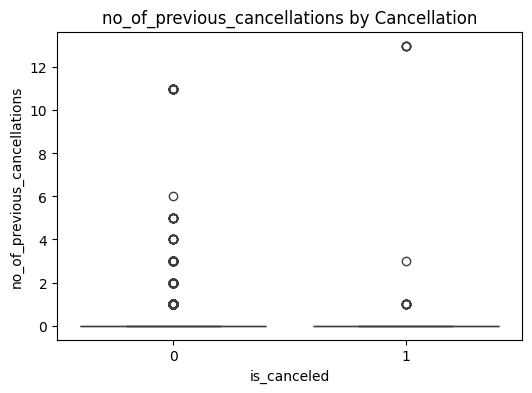

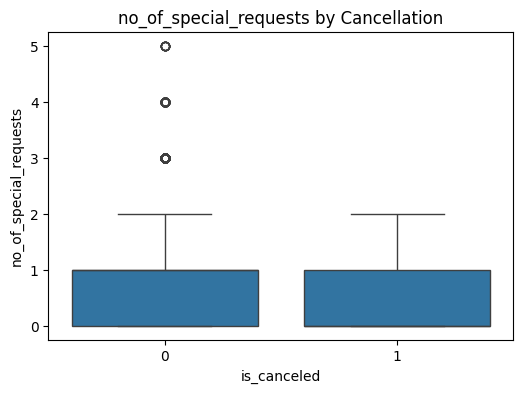

In [66]:
for c in ['lead_time','avg_price_per_room','no_of_previous_cancellations','no_of_special_requests']:
    if c in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='is_canceled', y=c, data=df)
        plt.title(f"{c} by Cancellation")
        plt.show()


In [67]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

for c in cat_cols:
    print("----", c, "----")
    print(df[c].value_counts().head(10))
    print()


Categorical columns: ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
---- Booking_ID ----
Booking_ID
INN36275    1
INN00001    1
INN00002    1
INN00003    1
INN00004    1
INN00005    1
INN00006    1
INN00007    1
INN00008    1
INN00009    1
Name: count, dtype: int64

---- type_of_meal_plan ----
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

---- room_type_reserved ----
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

---- market_segment_type ----
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

---- booking_status ----
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: in

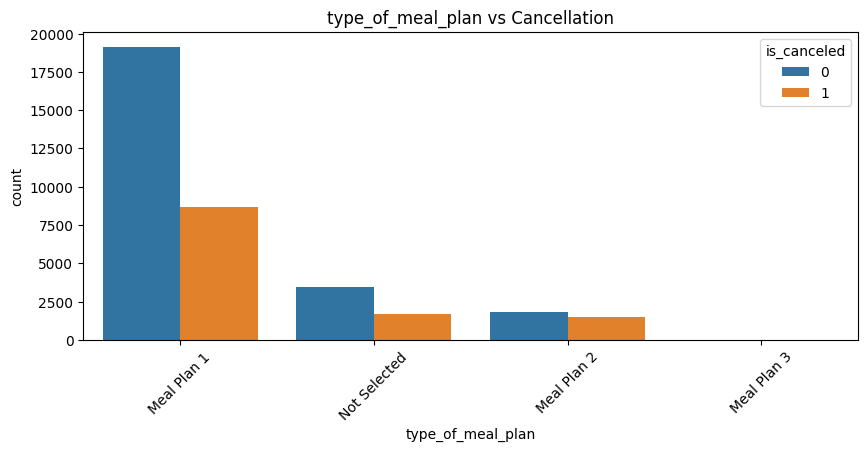

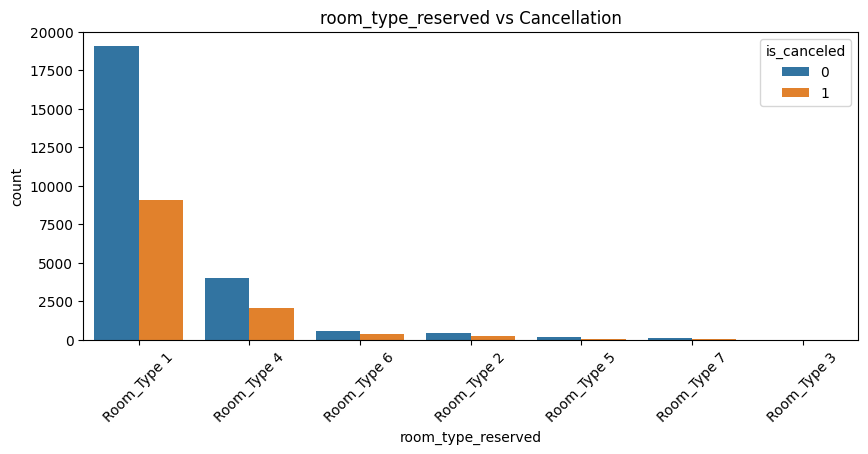

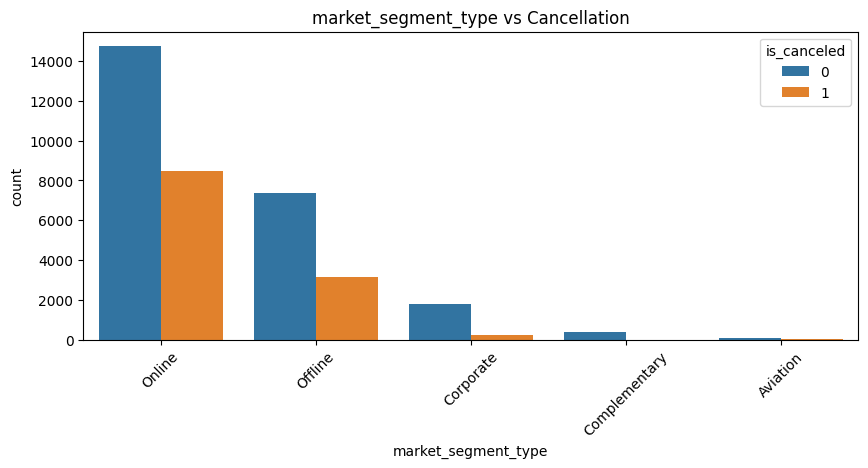

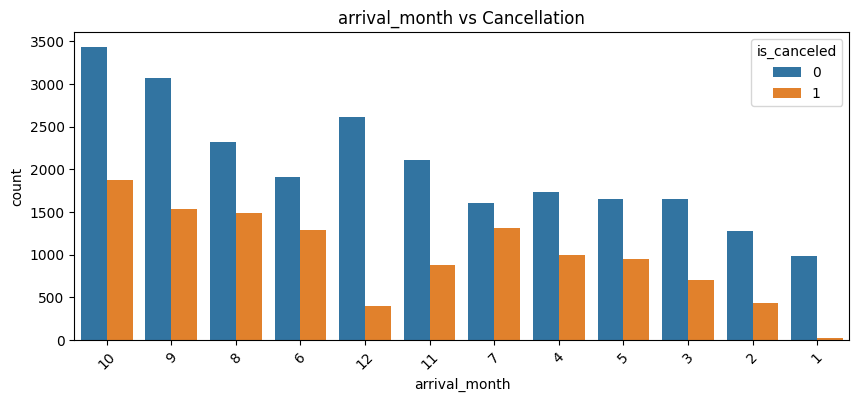

In [68]:
plot_cats = ['type_of_meal_plan','room_type_reserved','market_segment_type','arrival_month']
for c in plot_cats:
    if c in df.columns:
        plt.figure(figsize=(10,4))
        sns.countplot(x=c, hue='is_canceled', data=df, order=df[c].value_counts().index)
        plt.title(f"{c} vs Cancellation")
        plt.xticks(rotation=45)
        plt.show()


In [69]:
# 1. total_nights
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

# 2. total_guests
df['total_guests'] = df['no_of_adults'] + df['no_of_children']

df['total_guests'] = df['total_guests'].replace(0,1)

# 3. lead_time_cat (short/medium/long)
bins = [-1,30,180, df['lead_time'].max()+1]
labels = ['short','medium','long']
df['lead_time_cat'] = pd.cut(df['lead_time'], bins=bins, labels=labels)

# 4. avg_price_per_person (ADR per guest)
df['avg_price_per_person'] = df['avg_price_per_room'] / df['total_guests']

# 5. weekend_booking_flag (1 if weekend nights > 0)
df['weekend_booking'] = (df['no_of_weekend_nights'] > 0).astype(int)

# quick peek
df[['total_nights','total_guests','lead_time_cat','avg_price_per_person','weekend_booking']].head()


,total_nights,total_guests,lead_time_cat,avg_price_per_person,weekend_booking
0,3,2,long,32.50,1
1,5,2,short,53.34,1
2,3,1,short,60.00,1
3,2,2,long,50.00,0
4,2,2,medium,47.25,1


In [70]:
def cap_outliers(df, col):
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

outlier_cols = ['lead_time', 'avg_price_per_room', 'avg_price_per_person', 'total_nights']

for col in outlier_cols:
    cap_outliers(df, col)


In [71]:
df = df.drop(columns=['Booking_ID'])


In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = ['type_of_meal_plan','room_type_reserved','market_segment_type','lead_time_cat']
num_cols = df.select_dtypes(include=['int64','float64']).columns.drop('is_canceled')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib

drop_cols = ['Booking_ID', 'booking_status']  
df_model = df.drop(columns=[c for c in drop_cols if c in df.columns]).copy()

numeric_cols = df_model.select_dtypes(include=['int64','float64']).columns.tolist()
if 'is_canceled' in numeric_cols:
    numeric_cols.remove('is_canceled')

categorical_cols = df_model.select_dtypes(include=['object','category']).columns.tolist()
categorical_cols = [c for c in categorical_cols if c not in ['booking_status','Booking_ID']]

print("Numeric cols:", numeric_cols)
print("Categorical cols:", categorical_cols)

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
], remainder='drop')  

logreg_pipe = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', solver='saga', random_state=42))
])


Numeric cols: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'total_nights', 'total_guests', 'avg_price_per_person', 'weekend_booking']
Categorical cols: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'lead_time_cat']


In [74]:
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
df['total_guests'] = df['no_of_adults'] + df['no_of_children']
df['total_guests'] = df['total_guests'].replace(0,1)
bins = [-1,30,180, df['lead_time'].max()+1]
labels = ['short','medium','long']
df['lead_time_cat'] = pd.cut(df['lead_time'], bins=bins, labels=labels)
df['avg_price_per_person'] = df['avg_price_per_room'] / df['total_guests']
df['weekend_booking'] = (df['no_of_weekend_nights'] > 0).astype(int)

def cap_outliers(df, col):
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

for c in ['lead_time','avg_price_per_room','avg_price_per_person','total_nights']:
    cap_outliers(df, c)

train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, stratify=df['is_canceled'])
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42, stratify=temp_df['is_canceled'])

drop_cols = ['Booking_ID','booking_status']   # identifiers / original non-target
X_train = train_df.drop(columns=[c for c in drop_cols if c in train_df.columns] + ['is_canceled'], errors='ignore')
y_train = train_df['is_canceled']

X_val = val_df.drop(columns=[c for c in drop_cols if c in val_df.columns] + ['is_canceled'], errors='ignore')
y_val = val_df['is_canceled']

X_test = test_df.drop(columns=[c for c in drop_cols if c in test_df.columns] + ['is_canceled'], errors='ignore')
y_test = test_df['is_canceled']

numeric_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()

print("X_train shape:", X_train.shape)
print("Numeric cols:", numeric_cols)
print("Categorical cols:", categorical_cols)


X_train shape: (25392, 22)
Numeric cols: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'total_nights', 'total_guests', 'avg_price_per_person', 'weekend_booking']
Categorical cols: ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'lead_time_cat']


In [75]:


numeric_transformer = Pipeline([('scaler', StandardScaler())])
categorical_transformer = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
], remainder='drop')

logreg_pipe = Pipeline([('pre', preprocessor),
                        ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', solver='saga', random_state=42))])

logreg_pipe.fit(X_train, y_train)


,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Validation
y_val_pred = logreg_pipe.predict(X_val)
y_val_proba = logreg_pipe.predict_proba(X_val)[:,1]

val_acc = accuracy_score(y_val, y_val_pred)
val_prec = precision_score(y_val, y_val_pred, zero_division=0)
val_rec = recall_score(y_val, y_val_pred, zero_division=0)
val_f1 = f1_score(y_val, y_val_pred, zero_division=0)
val_roc = roc_auc_score(y_val, y_val_proba)

print("=== VALIDATION METRICS ===")
print(f"Accuracy:  {val_acc:.4f}")
print(f"Precision: {val_prec:.4f}")
print(f"Recall:    {val_rec:.4f}")
print(f"F1-score:  {val_f1:.4f}")
print(f"ROC-AUC:   {val_roc:.4f}")
print("\nConfusion matrix (val):")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification report (val):\n", classification_report(y_val, y_val_pred, zero_division=0))

# Test
y_test_pred = logreg_pipe.predict(X_test)
y_test_proba = logreg_pipe.predict_proba(X_test)[:,1]

test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred, zero_division=0)
test_rec = recall_score(y_test, y_test_pred, zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, zero_division=0)
test_roc = roc_auc_score(y_test, y_test_proba)

print("\n=== TEST METRICS ===")
print(f"Accuracy:  {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall:    {test_rec:.4f}")
print(f"F1-score:  {test_f1:.4f}")
print(f"ROC-AUC:   {test_roc:.4f}")
print("\nConfusion matrix (test):")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification report (test):\n", classification_report(y_test, y_test_pred, zero_division=0))


=== VALIDATION METRICS ===
Accuracy:  0.7840
Precision: 0.6409
Recall:    0.7757
F1-score:  0.7019
ROC-AUC:   0.8659

Confusion matrix (val):
[[2883  775]
 [ 400 1383]]

Classification report (val):
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      3658
           1       0.64      0.78      0.70      1783

    accuracy                           0.78      5441
   macro avg       0.76      0.78      0.77      5441
weighted avg       0.80      0.78      0.79      5441


=== TEST METRICS ===
Accuracy:  0.7848
Precision: 0.6399
Recall:    0.7852
F1-score:  0.7051
ROC-AUC:   0.8719

Confusion matrix (test):
[[2871  788]
 [ 383 1400]]

Classification report (test):
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      3659
           1       0.64      0.79      0.71      1783

    accuracy                           0.78      5442
   macro avg       0.76      0.78      0.77      5442
weig

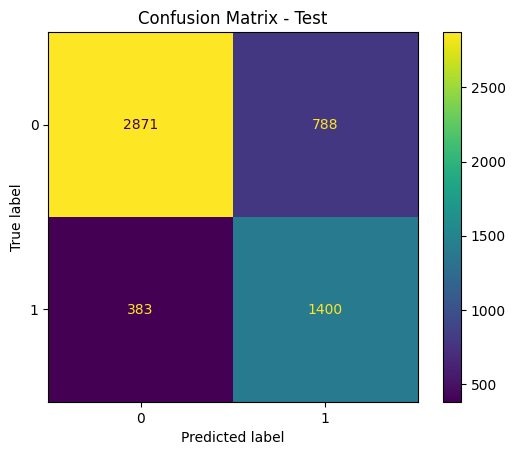

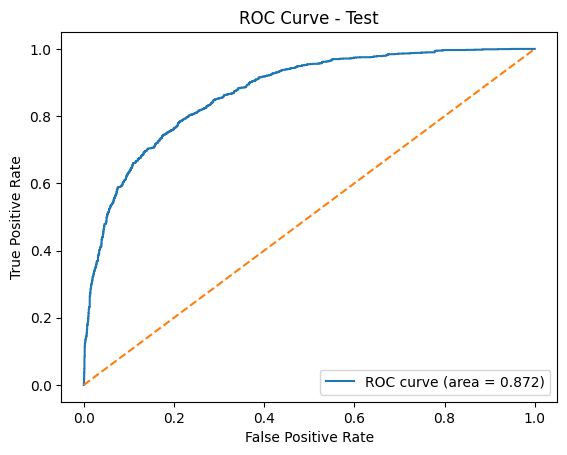

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Confusion matrix (test)
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_pipe.named_steps['clf'].classes_)
disp.plot()
plt.title('Confusion Matrix - Test')
plt.show()

# ROC curve (test)
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test')
plt.legend(loc='lower right')
plt.show()


In [78]:
import joblib
joblib.dump(logreg_pipe, 'logreg_pipeline.joblib')
print("Saved: logreg_pipeline.joblib")


Saved: logreg_pipeline.joblib


In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])


In [80]:
rf_pipe.fit(X_train, y_train)


,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [81]:
# Validation
y_val_pred_rf = rf_pipe.predict(X_val)
y_val_proba_rf = rf_pipe.predict_proba(X_val)[:,1]

val_acc_rf = accuracy_score(y_val, y_val_pred_rf)
val_prec_rf = precision_score(y_val, y_val_pred_rf, zero_division=0)
val_rec_rf = recall_score(y_val, y_val_pred_rf, zero_division=0)
val_f1_rf = f1_score(y_val, y_val_pred_rf, zero_division=0)
val_roc_rf = roc_auc_score(y_val, y_val_proba_rf)

print("=== RF VALIDATION METRICS ===")
print(f"Accuracy:  {val_acc_rf:.4f}")
print(f"Precision: {val_prec_rf:.4f}")
print(f"Recall:    {val_rec_rf:.4f}")
print(f"F1-score:  {val_f1_rf:.4f}")
print(f"ROC-AUC:   {val_roc_rf:.4f}")

print("\nConfusion matrix (val):")
print(confusion_matrix(y_val, y_val_pred_rf))


=== RF VALIDATION METRICS ===
Accuracy:  0.9006
Precision: 0.8805
Recall:    0.8059
F1-score:  0.8416
ROC-AUC:   0.9538

Confusion matrix (val):
[[3463  195]
 [ 346 1437]]


In [82]:
y_test_pred_rf = rf_pipe.predict(X_test)
y_test_proba_rf = rf_pipe.predict_proba(X_test)[:,1]

test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
test_prec_rf = precision_score(y_test, y_test_pred_rf, zero_division=0)
test_rec_rf = recall_score(y_test, y_test_pred_rf, zero_division=0)
test_f1_rf = f1_score(y_test, y_test_pred_rf, zero_division=0)
test_roc_rf = roc_auc_score(y_test, y_test_proba_rf)

print("\n=== RF TEST METRICS ===")
print(f"Accuracy:  {test_acc_rf:.4f}")
print(f"Precision: {test_prec_rf:.4f}")
print(f"Recall:    {test_rec_rf:.4f}")
print(f"F1-score:  {test_f1_rf:.4f}")
print(f"ROC-AUC:   {test_roc_rf:.4f}")

print("\nConfusion matrix (test):")
print(confusion_matrix(y_test, y_test_pred_rf))



=== RF TEST METRICS ===
Accuracy:  0.8927
Precision: 0.8676
Recall:    0.7936
F1-score:  0.8289
ROC-AUC:   0.9511

Confusion matrix (test):
[[3443  216]
 [ 368 1415]]


In [83]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipe = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', GradientBoostingClassifier(
        random_state=42
    ))
])


In [84]:
gb_pipe.fit(X_train, y_train)


,steps,"[('pre', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [85]:
# VALIDATION
y_val_pred_gb = gb_pipe.predict(X_val)
y_val_proba_gb = gb_pipe.predict_proba(X_val)[:,1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

val_acc_gb = accuracy_score(y_val, y_val_pred_gb)
val_prec_gb = precision_score(y_val, y_val_pred_gb, zero_division=0)
val_rec_gb = recall_score(y_val, y_val_pred_gb, zero_division=0)
val_f1_gb = f1_score(y_val, y_val_pred_gb, zero_division=0)
val_roc_gb = roc_auc_score(y_val, y_val_proba_gb)

print("=== GB VALIDATION METRICS ===")
print(f"Accuracy:  {val_acc_gb:.4f}")
print(f"Precision: {val_prec_gb:.4f}")
print(f"Recall:    {val_rec_gb:.4f}")
print(f"F1-score:  {val_f1_gb:.4f}")
print(f"ROC-AUC:   {val_roc_gb:.4f}")
print("\nConfusion matrix (val):")
print(confusion_matrix(y_val, y_val_pred_gb))

# TEST
y_test_pred_gb = gb_pipe.predict(X_test)
y_test_proba_gb = gb_pipe.predict_proba(X_test)[:,1]

test_acc_gb = accuracy_score(y_test, y_test_pred_gb)
test_prec_gb = precision_score(y_test, y_test_pred_gb, zero_division=0)
test_rec_gb = recall_score(y_test, y_test_pred_gb, zero_division=0)
test_f1_gb = f1_score(y_test, y_test_pred_gb, zero_division=0)
test_roc_gb = roc_auc_score(y_test, y_test_proba_gb)

print("\n=== GB TEST METRICS ===")
print(f"Accuracy:  {test_acc_gb:.4f}")
print(f"Precision: {test_prec_gb:.4f}")
print(f"Recall:    {test_rec_gb:.4f}")
print(f"F1-score:  {test_f1_gb:.4f}")
print(f"ROC-AUC:   {test_roc_gb:.4f}")
print("\nConfusion matrix (test):")
print(confusion_matrix(y_test, y_test_pred_gb))


=== GB VALIDATION METRICS ===
Accuracy:  0.8537
Precision: 0.8110
Recall:    0.7218
F1-score:  0.7638
ROC-AUC:   0.9137

Confusion matrix (val):
[[3358  300]
 [ 496 1287]]

=== GB TEST METRICS ===
Accuracy:  0.8550
Precision: 0.8142
Recall:    0.7224
F1-score:  0.7655
ROC-AUC:   0.9185

Confusion matrix (test):
[[3365  294]
 [ 495 1288]]


In [86]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'clf__n_estimators': [200, 300, 500, 700],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['auto', 'sqrt', 'log2']
}

rf_pipe_tuned = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

random_search = RandomizedSearchCV(
    estimator=rf_pipe_tuned,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [87]:
random_search.fit(X_train, y_train)
print("\nBest Params:", random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\parag\anaconda3\envs\dnn_env\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
9 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\parag\anaconda3\envs\dnn_env\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\parag\anaconda3\envs\dnn_env\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\parag\anaconda3\envs\dnn_env\lib\site-packages\sklearn\pipeline.py", line 663, in fit
    self._final_estimator.fit


Best Params: {'clf__n_estimators': 700, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_features': 'sqrt', 'clf__max_depth': None}


In [88]:
best_rf = random_search.best_estimator_

y_test_pred_best = best_rf.predict(X_test)
y_test_proba_best = best_rf.predict_proba(X_test)[:, 1]

print("\n=== TUNED RF TEST METRICS ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred_best))
print("Precision:", precision_score(y_test, y_test_pred_best))
print("Recall:", recall_score(y_test, y_test_pred_best))
print("F1:", f1_score(y_test, y_test_pred_best))
print("ROC-AUC:", roc_auc_score(y_test, y_test_proba_best))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_test_pred_best))



=== TUNED RF TEST METRICS ===
Accuracy: 0.8919514884233738
Precision: 0.8658909981628904
Recall: 0.7930454290521592
F1: 0.8278688524590164
ROC-AUC: 0.9517392481940137

Confusion matrix:
[[3440  219]
 [ 369 1414]]


In [89]:
ohe = best_rf.named_steps['pre'].named_transformers_['cat'].named_steps['ohe']
ohe_features = ohe.get_feature_names_out(categorical_cols)

all_features = list(numeric_cols) + list(ohe_features)

importances = best_rf.named_steps['clf'].feature_importances_

feat_imp = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

feat_imp.head(20)


,feature,importance
5,lead_time,0.208848
13,no_of_special_requests,0.109190
12,avg_price_per_room,0.100017
16,avg_price_per_person,0.087428
8,arrival_date,0.074423
7,arrival_month,0.071152
34,lead_time_cat_long,0.042878
14,total_nights,0.036132
3,no_of_week_nights,0.034529
36,lead_time_cat_short,0.032676


In [90]:
joblib.dump(best_rf, "final_random_forest_model.joblib")
print("Model saved!")


Model saved!
